In [1]:
#import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dense

Using TensorFlow backend.


In [0]:
#generating the training data with FIXED LENGTH=50
X = np.random.randint(2, size=(100000,50)).astype('float32')
y = [X.sum(axis = 1)%2]

#expand the dims of X to feed into LSTM
X = np.expand_dims(X, axis=2)

In [0]:
#generating random binary string samples of max length 50
X_var = []
y_var = []
for i in range(100000):
  val = np.random.randint(2, size=(np.random.randint(1,51))).astype('float32')
  X_var.append(val)
  y_var.append(val.sum()%2)
X_var = np.asarray(X_var)
y_var = np.asarray(y_var, dtype='float32')

#generating a padded sequnce of max length 50
from keras.preprocessing.sequence import pad_sequences
X_pad = pad_sequences(X_var, padding='pre', maxlen=50, dtype='float32')

In [28]:
print(X_pad.shape)
#expand dimensions to feed int the LSTMs
X_pad = np.expand_dims(X_pad, axis =2)
print(X_pad.shape)

(100000, 50)
(100000, 50, 1)


In [14]:
#build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(50,1), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50, 64)            16896     
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#train the model on fixed length sequences of 50
hstry = model.fit(X, y, epochs=10, validation_split=0.25, verbose = 2)




Train on 75000 samples, validate on 25000 samples
Epoch 1/10





 - 161s - loss: 0.6933 - acc: 0.4975 - val_loss: 0.6933 - val_acc: 0.5031
Epoch 2/10
 - 147s - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6932 - val_acc: 0.5031
Epoch 3/10
 - 147s - loss: 0.6932 - acc: 0.4993 - val_loss: 0.6931 - val_acc: 0.5031
Epoch 4/10
 - 147s - loss: 0.6932 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.5031
Epoch 5/10
 - 150s - loss: 0.6932 - acc: 0.4973 - val_loss: 0.6931 - val_acc: 0.5031
Epoch 6/10
 - 149s - loss: 0.6932 - acc: 0.4986 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 7/10
 - 150s - loss: 0.6932 - acc: 0.4981 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 8/10
 - 148s - loss: 0.6932 - acc: 0.4985 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 9/10
 - 150s - loss: 0.6932 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 10/10
 - 149s - loss: 0.6932 - acc: 0.4972 - val_loss: 0.6932 - val_acc: 0.4969


In [31]:
#train the LSTMs for a variable seuqnce with padding to make length 50
hstry_pad = model.fit(X_pad, y_var, validation_split=0.25, verbose = 2, epochs=10)

Train on 75000 samples, validate on 25000 samples
Epoch 1/10
 - 150s - loss: 7.3184e-05 - acc: 1.0000 - val_loss: 3.7668e-05 - val_acc: 1.0000
Epoch 2/10
 - 150s - loss: 2.2211e-05 - acc: 1.0000 - val_loss: 1.1724e-05 - val_acc: 1.0000
Epoch 3/10
 - 149s - loss: 6.9280e-06 - acc: 1.0000 - val_loss: 3.6680e-06 - val_acc: 1.0000
Epoch 4/10
 - 147s - loss: 2.1669e-06 - acc: 1.0000 - val_loss: 1.1502e-06 - val_acc: 1.0000
Epoch 5/10
 - 148s - loss: 6.8593e-07 - acc: 1.0000 - val_loss: 3.6542e-07 - val_acc: 1.0000
Epoch 6/10
 - 147s - loss: 2.3670e-07 - acc: 1.0000 - val_loss: 1.5237e-07 - val_acc: 1.0000
Epoch 7/10
 - 148s - loss: 1.2563e-07 - acc: 1.0000 - val_loss: 1.1284e-07 - val_acc: 1.0000
Epoch 8/10
 - 148s - loss: 1.1108e-07 - acc: 1.0000 - val_loss: 1.1020e-07 - val_acc: 1.0000
Epoch 9/10
 - 148s - loss: 1.1014e-07 - acc: 1.0000 - val_loss: 1.0988e-07 - val_acc: 1.0000
Epoch 10/10
 - 147s - loss: 1.0984e-07 - acc: 1.0000 - val_loss: 1.0975e-07 - val_acc: 1.0000


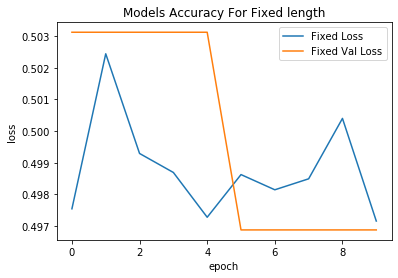

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
#Plot the Accuracy
plt.plot(hstry.history['acc'])
plt.plot(hstry.history['val_acc'])
plt.title('Models Accuracy For Fixed length')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Fixed Loss', 'Fixed Val Loss'])
plt.show()

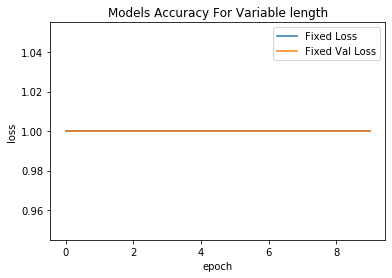

In [54]:
#Plot the Accuracy for Variable length
plt.plot(hstry_pad.history['acc'])
plt.plot(hstry_pad.history['val_acc'])
plt.title('Models Accuracy For Variable length')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Fixed Loss', 'Fixed Val Loss'])
plt.show()

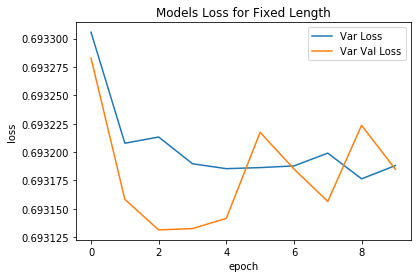

In [55]:
#Plot the Loss for Fixed length
plt.plot(hstry.history['loss'])
plt.plot(hstry.history['val_loss'])
plt.title('Models Loss for Fixed Length')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Var Loss', 'Var Val Loss'])
plt.show()

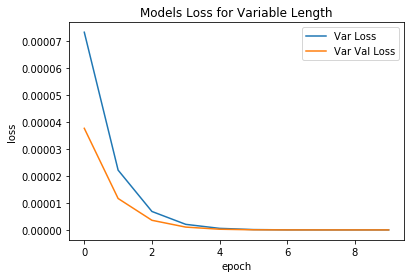

In [56]:
#Plot the Loss For variable length
plt.plot(hstry_pad.history['loss'])
plt.plot(hstry_pad.history['val_loss'])
plt.title('Models Loss for Variable Length')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Var Loss', 'Var Val Loss'])
plt.show()